In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

In [185]:
t1=pd.read_csv("/content/train.csv")

In [186]:
t1.tail()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
67458,16164945,13601,6848,13175.28583,59,BAT3193689,9.408858,C,A4,MORTGAGE,83961.15003,Verified,n,Credit card refinancing,28.105127,1,0,13,0,4112,97.779389,19,w,1978.945960,0.023478,564.614852,0.865230,0,INDIVIDUAL,69,0,48,181775,34301,1
67459,35182714,8323,11046,15637.46301,59,BAT1780517,9.972104,C,B3,RENT,65491.12817,Source Verified,n,Credit card refinancing,17.694279,0,0,12,0,9737,15.690703,14,w,3100.803125,0.027095,2.015494,1.403368,0,INDIVIDUAL,14,0,37,22692,8714,0
67460,16435904,15897,32921,12329.45775,59,BAT1761981,19.650943,A,F3,MORTGAGE,34813.96985,Verified,n,Lending loan,10.295774,0,0,7,1,2195,1.500090,9,w,2691.995532,0.028212,5.673092,1.607093,0,INDIVIDUAL,137,0,17,176857,42330,0
67461,5300325,16567,4975,21353.68465,59,BAT2333412,13.169095,D,E3,OWN,96938.83564,Not Verified,n,Debt consolidation,7.614624,0,0,14,0,1172,68.481882,15,f,3659.334202,0.074508,1.157454,0.207608,0,INDIVIDUAL,73,0,61,361339,39075,0
67462,65443173,15353,29875,14207.44860,59,BAT1930365,16.034631,B,D1,MORTGAGE,105123.15580,Verified,n,Debt consolidation,16.052112,0,0,30,0,8762,81.692328,16,f,1324.255922,0.000671,1.856480,0.366386,0,INDIVIDUAL,54,0,47,196960,66060,0


In [187]:
t1.isnull().values.any()

False

In [188]:
t2=t1.set_index("ID")

In [189]:
t2=t2.rename(columns={"Loan Status":"Y"})

In [190]:
t2.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Y
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.57590,Source Verified,n,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.82545,Source Verified,n,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [191]:
t2.drop(columns="Payment Plan",inplace=True)

In [192]:
t2.dtypes

Loan Amount                       int64
Funded Amount                     int64
Funded Amount Investor          float64
Term                              int64
Batch Enrolled                   object
Interest Rate                   float64
Grade                            object
Sub Grade                        object
Employment Duration              object
Home Ownership                  float64
Verification Status              object
Loan Title                       object
Debit to Income                 float64
Delinquency - two years           int64
Inquires - six months             int64
Open Account                      int64
Public Record                     int64
Revolving Balance                 int64
Revolving Utilities             float64
Total Accounts                    int64
Initial List Status              object
Total Received Interest         float64
Total Received Late Fee         float64
Recoveries                      float64
Collection Recovery Fee         float64


In [193]:
#c=["Batch Enrolled","Grade","Sub Grade","Employment Duration","Verification Status","Loan Title","Initial List Status","Application Type"]
len(c)

8

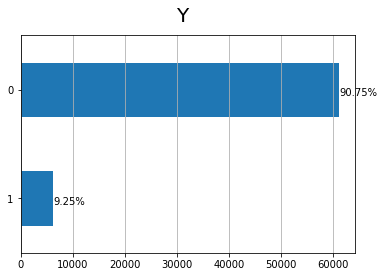

In [194]:
y = "Y"
ax = t2[y].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(y, fontsize=20)
plt.show()

In [195]:
from sklearn import model_selection

In [196]:
t2_train, t2_test = model_selection.train_test_split(t2, 
                      test_size=0.3)

**Label Encoding**

In [197]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
c=["Batch Enrolled","Grade","Sub Grade","Employment Duration","Verification Status","Loan Title","Initial List Status","Application Type"]
for i in c:
    t2_train[i]= label_encoder.fit_transform(t2_train[i])

In [198]:
'''
c=["Employment Duration","Verification Status","Loan Title","Initial List Status","Application Type"]
for i in c:
    ## create dummy
    dummy = pd.get_dummies(t2_train[i], 
                          prefix=i,drop_first=True)
    t2_train= pd.concat([t2_train, dummy], axis=1)
    print( t2_train.filter(like=i, axis=1).head() )
    ## drop the original categorical column
    ##Change from website here below
    t2_train = t2_train.drop(i, axis=1)
'''

'\nc=["Employment Duration","Verification Status","Loan Title","Initial List Status","Application Type"]\nfor i in c:\n    ## create dummy\n    dummy = pd.get_dummies(t2_train[i], \n                          prefix=i,drop_first=True)\n    t2_train= pd.concat([t2_train, dummy], axis=1)\n    print( t2_train.filter(like=i, axis=1).head() )\n    ## drop the original categorical column\n    ##Change from website here below\n    t2_train = t2_train.drop(i, axis=1)\n'

In [199]:
from sklearn import preprocessing

**Scaling Data**

In [200]:
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(t2_train.drop("Y", axis=1))
t2_scaled= pd.DataFrame(X, columns=t2_train.drop("Y", axis=1).columns, index=t2_train.index)
t2_scaled["Y"] = t2_train["Y"]
t2_scaled.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Y
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
49860011,0.393633,0.607091,0.269137,0.956522,0.675,0.225377,0.333333,0.323529,1.0,0.093165,1.0,0.351852,0.977845,0.000,0.0,0.742857,0.00,0.072862,0.542175,0.313433,0.0,0.163237,0.002082,0.000294,0.002784,0.0,0.0,0.118012,0.0,0.003045,0.002870,0.117056,0
35112549,0.110281,0.579344,0.616774,0.956522,0.600,0.479729,0.000000,0.382353,0.0,0.088936,0.5,0.351852,0.328497,0.000,0.0,0.285714,0.00,0.409140,0.611855,0.283582,1.0,0.049801,0.001038,0.000977,0.005716,0.0,0.0,0.826087,0.0,0.002192,0.061850,0.342473,0
20635472,0.080386,0.201206,0.431561,1.000000,0.550,0.432302,0.500000,0.088235,0.0,0.096670,0.0,0.129630,0.400308,0.000,0.0,0.314286,0.25,0.208581,0.452897,0.343284,1.0,0.004652,0.001335,0.000684,0.002065,0.0,0.0,0.236025,0.0,0.000792,0.335345,0.037887,1
17910017,0.068675,0.240400,0.260629,1.000000,0.225,0.168429,0.666667,0.352941,0.0,0.148057,0.5,0.694444,0.817746,0.000,0.0,0.257143,0.00,0.039399,0.630328,0.223881,0.0,0.198372,0.001494,0.001471,0.006033,0.0,0.0,0.086957,0.0,0.000305,0.221564,0.185389,0
6695710,0.437621,0.404090,0.638993,1.000000,0.400,0.438556,0.500000,0.117647,0.0,0.217288,0.5,0.453704,0.962755,0.125,0.0,0.628571,0.00,0.083347,0.649002,0.223881,1.0,0.118544,0.415982,0.001081,0.000029,0.0,0.0,0.559006,0.0,0.002436,0.142974,0.035689,0


In [201]:
from sklearn import ensemble

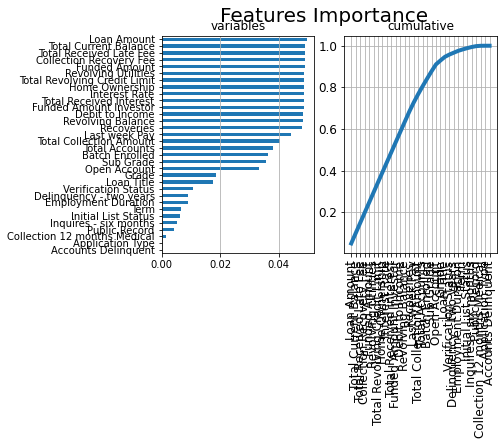

In [209]:
X = t2_train.drop("Y", axis=1).values
y = t2_train["Y"].values
feature_names = t2_train.drop("Y", axis=1).columns.tolist()
## Importance
model = ensemble.RandomForestClassifier(n_estimators=100,
                      criterion="entropy", random_state=0)
model.fit(X,y)
importances = model.feature_importances_
## Put in a pandas dtf
dtf_importances = pd.DataFrame({"IMPORTANCE":importances, 
            "VARIABLE":feature_names}).sort_values("IMPORTANCE", 
            ascending=False)
dtf_importances['cumsum'] = dtf_importances['IMPORTANCE'].cumsum(axis=0)
dtf_importances = dtf_importances.set_index("VARIABLE")
    
## Plot
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False)
fig.suptitle("Features Importance", fontsize=20)
ax[0].title.set_text('variables')
dtf_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(kind="barh", legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel="")
ax[1].title.set_text('cumulative')
dtf_importances[["cumsum"]].plot(kind="line", linewidth=4, 
                                 legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(dtf_importances)), 
          xticklabels=dtf_importances.index)
plt.xticks(rotation=90)
plt.grid(axis='both')
plt.tick_params(axis='x', which='major', labelsize="large")
plt.tick_params(axis='y', which='major', labelsize="large")
#plt.tight_layout()

plt.show()
